<img src="./spectrogram.jpg" width="800" height="400">

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To play sounds:

In [71]:
from playsound import playsound

Librosa - main library for audio processing https://librosa.github.io/librosa/index.html

In [72]:
import librosa
import librosa.display

Importante - su Windows va installato separatamente [ffmpeg](https://www.ffmpeg.org/)  https://www.ffmpeg.org/

basta avere ffmpeg.exe nella stessa cartella del notebook o nel PATH

In [205]:
files = ['Audio/3KLANG2.WAV',
         'Audio/PIANO1.WAV',
         'Audio/ZIRP.WAV',
         'Audio/YODEL.WAV',
         'Audio/ZINGSPLT.WAV']
#        'Audio/DARKSIDE.WAV',
#        'Audio/SPACE.WAV']

iter_files = iter(files)

In [210]:
file = next(iter_files)
y, sr = librosa.load(file)
info = (f'Samples:{len(y)} Sampling Rate:{sr} Seconds:{len(y)/sr:6.2f}')
print(file,info)

Audio/ZINGSPLT.WAV Samples:25812 Sampling Rate:22050 Seconds:  1.17


In [211]:
playsound(file)

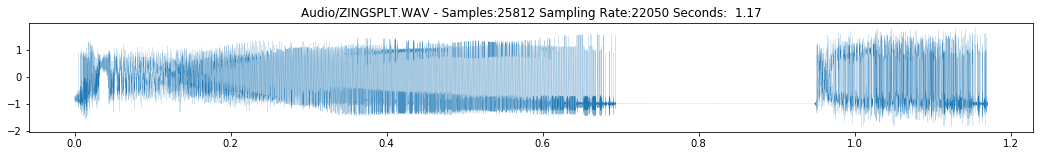

In [212]:
plt.figure(figsize=(18,2))
x=np.linspace(0,len(y)/sr,len(y))
plt.title(f'{file} - {info}')
plt.plot(x,y,lw=0.1);


In [213]:
window = 'hann'
# 'boxcar', 'triang','blackman','hamming',       'hann',   'bartlett',
# 'flattop','parzen','bohman',  'blackmanharris','nuttall','barthann']
# ['kaiser','gaussian','general_gaussian','slepian','dpss','chebwin','exponential','tukey']

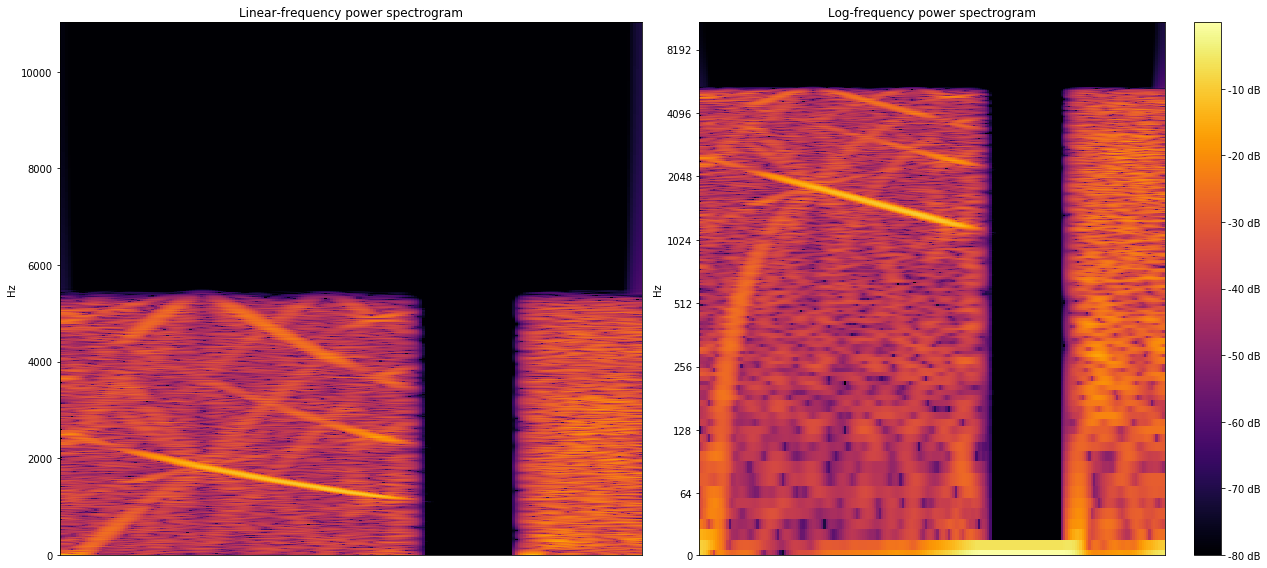

In [214]:
plt.figure(figsize=(18, 8))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y,window=window,n_fft=2048,hop_length=128)), ref=np.max)
plt.subplot(1, 2, 1)
librosa.display.specshow(D, y_axis='linear',cmap='inferno',)
plt.title('Linear-frequency power spectrogram')
plt.subplot(1, 2, 2)
librosa.display.specshow(D, y_axis='log',cmap='inferno')
plt.title('Log-frequency power spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()

### Kaggle competition:  Freesound Audio Tagging 2019
https://www.kaggle.com/c/freesound-audio-tagging-2019/overview

One year ago, Freesound and Google’s Machine Perception hosted an audio tagging competition challenging Kagglers to build a general-purpose auto tagging system. This year they’re back and taking the challenge to the next level with multi-label audio tagging, doubled number of audio categories, and a noisier than ever training set. If you like raising your ML game, this challenge is for you.
![](https://storage.googleapis.com/kaggle-media/competitions/freesound/task2_freesound_audio_tagging.png)

### Fast.ai Solution proposal

https://www.kaggle.com/daisukelab/cnn-2d-basic-solution-powered-by-fast-ai

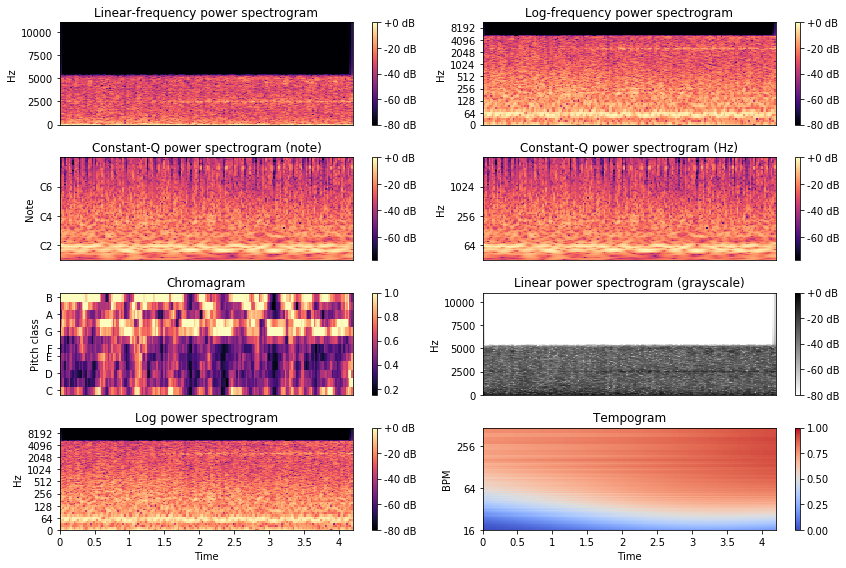

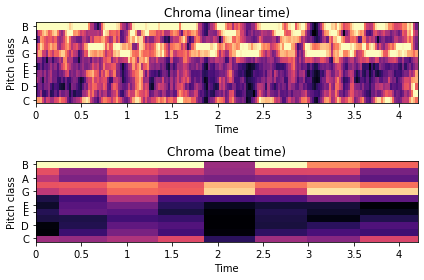

In [174]:
# Visualize an STFT power spectrum


y, sr = librosa.load(file)
plt.figure(figsize=(12, 8))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# Or on a logarithmic scale

plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

# Or use a CQT scale

CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
plt.subplot(4, 2, 3)
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')

plt.subplot(4, 2, 4)
librosa.display.specshow(CQT, y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')

# Draw a chromagram with pitch classes

C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.subplot(4, 2, 5)
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')

# Force a grayscale colormap (white -> black)

plt.subplot(4, 2, 6)
librosa.display.specshow(D, cmap='gray_r', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear power spectrogram (grayscale)')

# Draw time markers automatically

plt.subplot(4, 2, 7)
librosa.display.specshow(D, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log power spectrogram')

# Draw a tempogram with BPM markers

plt.subplot(4, 2, 8)
Tgram = librosa.feature.tempogram(y=y, sr=sr)
librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram')
plt.tight_layout()
plt.show()

# Draw beat-synchronous chroma in natural time

plt.figure()
tempo, beat_f = librosa.beat.beat_track(y=y, sr=sr, trim=False)
beat_f = librosa.util.fix_frames(beat_f, x_max=C.shape[1])
Csync = librosa.util.sync(C, beat_f, aggregate=np.median)
beat_t = librosa.frames_to_time(beat_f, sr=sr)
ax1 = plt.subplot(2,1,1)
librosa.display.specshow(C, y_axis='chroma', x_axis='time')
plt.title('Chroma (linear time)')
ax2 = plt.subplot(2,1,2, sharex=ax1)
librosa.display.specshow(Csync, y_axis='chroma', x_axis='time',
                         x_coords=beat_t)
plt.title('Chroma (beat time)')
plt.tight_layout()
plt.show()
